<a href="https://colab.research.google.com/github/dkrsek/401-0614-00L-Probability-and-Statistics/blob/main/Uncor_vs_indep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uncorrelatedness vs. Independence

This is a short notebook that illustrates the main ideas of Exercise 8.8.

In [179]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

N=500
U_array = -np.pi+ (2*np.pi)*np.random.uniform(0, 1, N)


Recall that to obtain a uniform distribution on $[-\pi, \pi]$, we can generate $ U_0 \sim \mathcal{U}([0,1]) $ and then transform it as $U= -\pi + 2\pi U_0$, see Exercise 6.6.(a). We can have a look at the histogram:


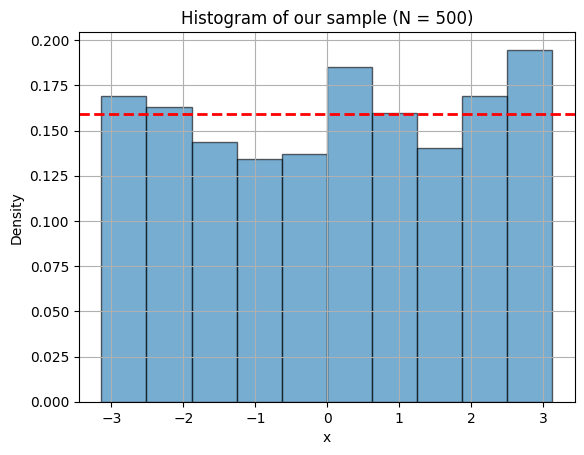

In [180]:
# Plot of the histogram
plt.axhline(y=0.159, color='red', linestyle='--', linewidth=2)
plt.hist(U_array, bins='auto', density=True, edgecolor='black',alpha=0.6)
plt.xlabel('x')
plt.ylabel('Density')
plt.title(f'Histogram of our sample (N = {N})')
plt.grid(True)
plt.show()

Densities are notoriously difficult to estimate, so don't be too surprised that it doesn't look very accurate. The value of the theoretical density for $x \in [-\pi,\pi]$ is $1/(2 \pi) \approx 0.159$.

In [181]:
x_array=np.sin(U_array)
y_array=np.cos(U_array)

#There is of course a built-in function in the library for computing the mean and covariance. But for illustration, we’ll compute them from scratch
def mean (arr):
#We estimate the expectation by computing the average of the values. This will be discussed in more detail later on. For now, just try to understand the idea intuitively
    return np.sum(arr)/len(arr)

def cov (x_ar,y_ar):
  return np.mean(x_ar*y_ar)-np.mean(x_ar)*np.mean(y_ar) # We compute Cov(X,Y)=E[XY]-E[X]E[Y]

print(cov(x_array,y_array))



0.002224588976297614


We see that it is essentially zero, which is the theoretical value. We can compare it with the built-in function from the library:



In [183]:
print(np.cov(x_array,y_array)[0, 1])

0.0022290470704384854


Let us plot the joint distribution of $(X, Y)$:

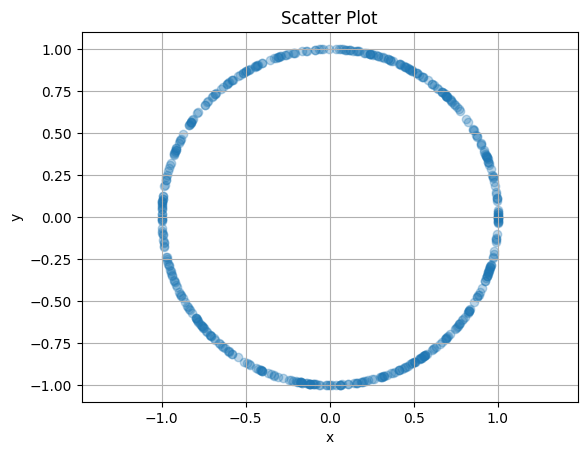

In [184]:
plt.scatter(x_array, y_array, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.grid(True)
plt.axis('equal')
plt.show()

We see that the joint distribution of $(X, Y)$ is concentrated on a circle. This is obvious, since
$$
X^2 + Y^2 = \sin^2(U) + \cos^2(U) = 1.
$$
It is therefore clear that $X$ and $Y$ cannot be independent. If they were, the joint distribution would have a more "rectangular" shape.

### What would it look like if $X$ and $Y$ were independent?

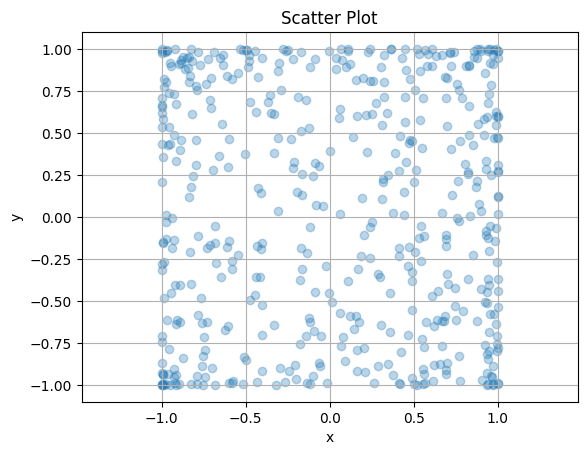

In [185]:
 # Now we'll generate a new sample that is independent of the previous one
U2_array=-np.pi+ (2*np.pi)*np.random.uniform(0, 1, N)
# We generate a sample of a new variable Y2 with the same distribution as Y. Since it is based on the new independent variable U2, Y2 is independent of X.
y2_array=np.cos(U2_array)


plt.scatter(x_array, y2_array, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.grid(True)
plt.axis('equal')
plt.show()

We see that the scatterplot looks completely different when $X$ and $Y$ are independent. It should also be clear that the joint distribution is **not** uniform over the square. There are too many points close to the boundary and especially in the corners.


 You can try finding the joint density as an exercise. You should get that both $X$ and $Y$ have the [arcsine distribution](https://en.wikipedia.org/wiki/Arcsine_distribution). (However, you have to be careful as $\sin$ and $\cos$ are not invertible on $[-\pi,\pi]$). The joint density is then simply the product of the marginal densities thanks to independence. We can compare the histograms of $X$ and $Y$ with the theoretical density of the arcsine distribution.


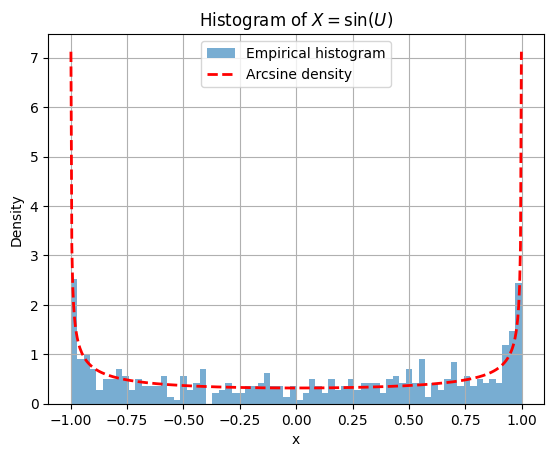

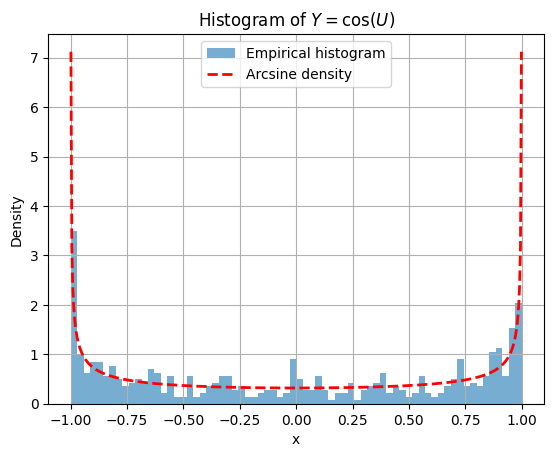

In [ ]:
# Plot histogram of X
plt.hist(x_array, bins=70, density=True, alpha=0.6, label='Empirical histogram')

# Theoretical arcsine PDF
x_vals = np.linspace(-0.999, 0.999, 500)
pdf_vals = 1 / (np.pi * np.sqrt(1 - x_vals**2))
plt.plot(x_vals, pdf_vals, 'r--', linewidth=2, label='Arcsine density')


plt.xlabel('x')
plt.ylabel('Density')
plt.title(r'Histogram of $X = \sin(U)$')
plt.legend()
plt.grid(True)
plt.show()

# Plot histogram of Y
plt.hist(y_array, bins=70, density=True, alpha=0.6, label='Empirical histogram')

# Theoretical arcsine PDF
plt.plot(x_vals, pdf_vals, 'r--', linewidth=2, label='Arcsine density')


plt.xlabel('x')
plt.ylabel('Density')
plt.title(r'Histogram of $Y = \cos(U)$')
plt.legend()
plt.grid(True)
plt.show()